# Discover and Visualize the Data to Gain Insights

### Import the training set

In [1]:
import os
import pandas as pd
import numpy as np 
from pandas.plotting import scatter_matrix
# The following is to make some plots along the way 
import seaborn as sns 
import matplotlib.pyplot as plt

DATA_PATH = "datasets"

def load_train_data(data_path:str = DATA_PATH) -> pd.DataFrame:
    """read the data from csv and return panda data from,"""
    csv_path = os.path.join(data_path,"train.csv")
    return pd.read_csv(csv_path)

def load_test_data(data_path:str = DATA_PATH) -> pd.DataFrame:
    """read the data from csv and return panda data from,"""
    csv_path = os.path.join(data_path,"test.csv")
    return pd.read_csv(csv_path)

# sklearn tools:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.model_selection import cross_val_score
# modeler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [2]:
train_set = load_train_data()
test_set = load_test_data()
df_cancer = train_set
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
1,1,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
2,0,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
3,0,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
4,0,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [3]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                455 non-null    int64  
 1   radius_mean              455 non-null    float64
 2   texture_mean             455 non-null    float64
 3   perimeter_mean           455 non-null    float64
 4   area_mean                455 non-null    float64
 5   smoothness_mean          455 non-null    float64
 6   compactness_mean         455 non-null    float64
 7   concavity_mean           455 non-null    float64
 8   concave points_mean      455 non-null    float64
 9   symmetry_mean            455 non-null    float64
 10  fractal_dimension_mean   455 non-null    float64
 11  radius_se                455 non-null    float64
 12  texture_se               455 non-null    float64
 13  perimeter_se             455 non-null    float64
 14  area_se                  4

<AxesSubplot:>

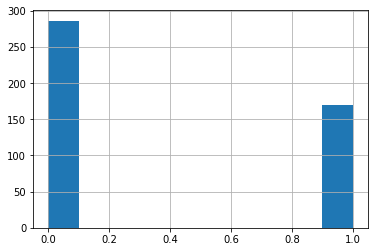

In [5]:
df_cancer.diagnosis.hist()

In [ ]:
df_cancer.describe()

# Looking for Correlations

In [ ]:
corr_matrix = df_cancer.corr(method='pearson')

In [ ]:
corr_vector=corr_matrix["diagnosis"].sort_values(ascending=True)[:-1]
corr_vector.plot.barh(figsize=(16,24));


In [ ]:
important_attributes=corr_vector[corr_vector > 0.5].index.tolist()
important_attributes.append('diagnosis')
less_important = corr_vector[corr_vector <= 0.5].index.tolist()
less_important.append('diagnosis')

In [ ]:
figure_most=sns.pairplot(df_cancer[important_attributes], hue="diagnosis");
figure_most.savefig(r"plots/corr_big.png")
figure_least=sns.pairplot(df_cancer[less_important], hue="diagnosis");
figure_least.savefig(r"plots/corr_less_corr.png")

# Choose some intresting ones

In [ ]:
attributes =['diagnosis',
             'area_mean',
             'radius_mean',
             'area_worst',
             'perimeter_mean',
             'radius_worst']

In [ ]:
scatter_matrix(df_cancer[attributes], figsize=(20, 14));

In [ ]:
#figure=sns.pairplot(df_cancer[attributes], hue="diagnosis");
#figure.savefig(r"plots/corr.png")

In [ ]:
H_A= ['perimeter_worst',
 'concave points_mean',
 'concave points_worst']

In [ ]:
scatter_matrix(df_cancer[H_A], figsize=(20, 14));

# devide to X and Y

In [ ]:
X, y = train_set.drop('diagnosis',axis=1), train_set['diagnosis']
X_test,y_test= test_set.drop('diagnosis',axis=1), test_set['diagnosis']

In [ ]:
X

In [ ]:
scaler = Normalizer()
scaler.fit(X)
selection = SelectKBest(chi2,k=10)
qt = QuantileTransformer(n_quantiles=20, random_state=0)
lg_clf = LogisticRegression()

In [ ]:
lg_pipe = make_pipeline(qt,selection,clf)
skf = StratifiedKFold(5,shuffle=True,random_state=0)
cross_val_score(pipe,X,y,cv=skf,scoring='accuracy').mean()


In [ ]:
#pipe.fit(X,y)

In [ ]:
#pipe.predict(X_test)

In [ ]:
pipe.score(X_test,y_test)

In [ ]:
pipe.named_steps.logisticregression.coef_

In [ ]:
used=pipe.named_steps.selectkbest.get_support()

In [ ]:
X.columns[used]

In [ ]:
used_list=used.tolist()

In [ ]:
used_list.append('diagnosis')
figure_most_important=sns.pairplot(df_cancer[important_attributes], hue="diagnosis");
figure_most_important.savefig(r"plots/corr_important.png")

In [ ]:
#qt = QuantileTransformer(n_quantiles=20, random_state=0)
#lg_clf = LogisticRegression()
#lg_pipe = make_pipeline(qt,selection,lg_clf)

In [ ]:
#estimators = [xgb_clf]
#for estimator in estimators:
#    print("select FE in the", estimator.__class__.__name__)
#    selector = RFECV(estimator, step=1, cv=5)
#    selector.fit(X_train, y_train)

In [ ]:
#selector = RFECV(estimator, step=1, cv=5)